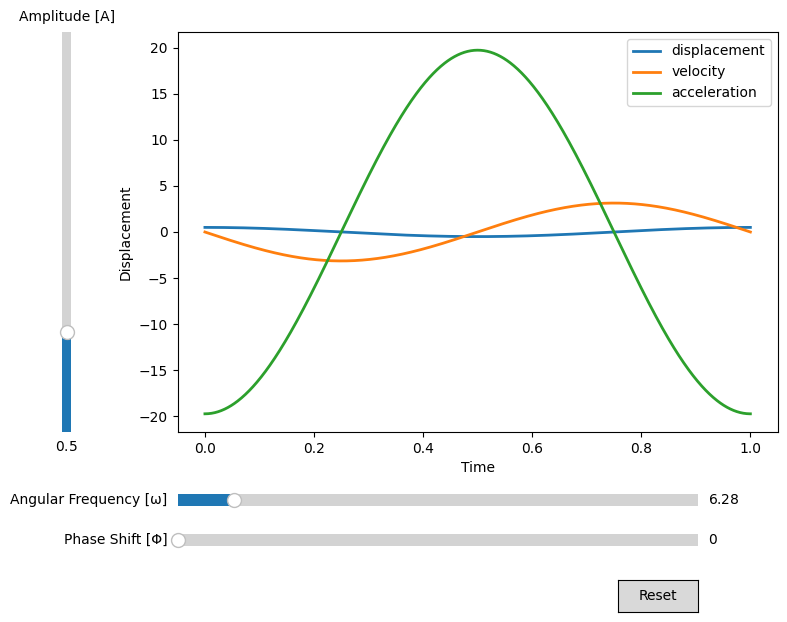

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The function for displacement
def x(t, amplitude, frequency, phaseShift):
    return amplitude * np.cos(frequency * t + phaseShift)

#The function for velocity
def v(t, amplitude, frequency, phaseShift):
    return (-1) * amplitude * frequency * np.sin(frequency * t + phaseShift)

#The function for acceleration
def a(t, amplitude, frequency, phaseShift):
    return (-1) * amplitude * frequency**2 * np.cos(frequency * t + phaseShift)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 0.5
init_frequency = 2 * np.pi
init_phaseShift = 0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize=(8, 8))
lineX, = ax.plot(t, x(t, init_amplitude, init_frequency, init_phaseShift), lw=2, label='displacement')
lineV, = ax.plot(t, v(t, init_amplitude, init_frequency, init_phaseShift), lw=2, label='velocity')
lineA, = ax.plot(t, a(t, init_amplitude, init_frequency, init_phaseShift), lw=2, label='acceleration')
ax.set_xlabel('Time')
ax.set_ylabel('Displacement')
ax.legend(handles=[lineX, lineV, lineA], loc = 'upper right')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25, top=0.75, right=1)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.15, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Angular Frequency [ω]',
    valmin=1,
    valmax=50,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.5])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude [A]",
    valmin=0,
    valmax=2,
    valinit=init_amplitude,
    orientation="vertical"
)

# Make a horizontal slider to control the phase shift.
axshift = fig.add_axes([0.25, 0.1, 0.65, 0.03])
shift_slider = Slider(
    ax=axshift,
    label='Phase Shift [Φ]',
    valmin=0,
    valmax=10,
    valinit=init_phaseShift,
)

# The function to be called anytime a slider's value changes
def update(val):
    lineX.set_ydata(x(t, amp_slider.val, freq_slider.val, shift_slider.val))
    lineV.set_ydata(v(t, amp_slider.val, freq_slider.val, shift_slider.val))
    lineA.set_ydata(a(t, amp_slider.val, freq_slider.val, shift_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)
shift_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
    shift_slider.reset()
button.on_clicked(reset)

plt.show()